# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [2]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [7]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print xs,'\n'
print xs.index,'\n'

# Values of the Series are actually a numpy array
print xs.values, type(xs.values),'\n'
print xs['f'], xs.f, xs.h, '\n'
print xs[['d', 'f', 'h']], '\n'

a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

Index([u'a', u'b', u'c', u'd', u'e', u'f', u'g', u'h', u'i', u'j'], dtype='object') 

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <type 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 



In [8]:
# Extracting elements and operations: same as numpy array
print xs[:3],'\n'
print xs[7:], '\n'
print xs[::3], '\n'
print xs[xs>3], '\n'
print np.exp(xs), '\n'
print np.mean(xs), np.std(xs), '\n'

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.43614066163 



In [9]:
# Series can be created from python dictionary too.
# Note that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



a       cat
b         1
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without giving consideration to whether the Series involved have the same labels.

In [18]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print "s : \n ",s
s[1:] + s[:-1]

s : 
  a   -0.156048
b   -1.153354
c   -1.064543
d   -0.362394
e   -0.826270
dtype: float64


a         NaN
b   -2.306709
c   -2.129086
d   -0.724788
e         NaN
dtype: float64

### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas as a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [28]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
date = dt.datetime(2018,12,22,10,4,10,15)
print date

# otherwise, several notations are interpreted too
date = 'Nov 19 2018'
date = '19/11/2018 14:45:00'
print date

days = pd.date_range(date, periods=7, freq='D')
print days

seconds = pd.date_range(date, periods=3600, freq='s')
print seconds


2018-12-22 10:04:10.000015
19/11/2018 14:45:00
DatetimeIndex(['2018-11-19 14:45:00', '2018-11-20 14:45:00',
               '2018-11-21 14:45:00', '2018-11-22 14:45:00',
               '2018-11-23 14:45:00', '2018-11-24 14:45:00',
               '2018-11-25 14:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2018-11-19 14:45:00', '2018-11-19 14:45:01',
               '2018-11-19 14:45:02', '2018-11-19 14:45:03',
               '2018-11-19 14:45:04', '2018-11-19 14:45:05',
               '2018-11-19 14:45:06', '2018-11-19 14:45:07',
               '2018-11-19 14:45:08', '2018-11-19 14:45:09',
               ...
               '2018-11-19 15:44:50', '2018-11-19 15:44:51',
               '2018-11-19 15:44:52', '2018-11-19 15:44:53',
               '2018-11-19 15:44:54', '2018-11-19 15:44:55',
               '2018-11-19 15:44:56', '2018-11-19 15:44:57',
               '2018-11-19 15:44:58', '2018-11-19 15:44:59'],
              dtype='datetime64[ns]', length=3600, fr

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset

In [31]:
tstamp = pd.Timestamp(dt.datetime(2018, 11, 19))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print tstamp.value

# when creating a timestamp the format can be explicitly passed
print pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')


1542585600000000000
2010-11-12 00:00:00
2010-11-12 00:00:00


A standard series can be created and (range of) elements can be used as indexes

In [39]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print tseries[0:4], '\n'
print tseries['2018-11-19':'2018-11-21'], '\n' # Note - includes end time


2018-11-19 14:45:00    10.583876
2018-11-20 14:45:00    10.067412
2018-11-21 14:45:00     9.910855
2018-11-22 14:45:00     9.013324
Freq: D, dtype: float64 

2018-11-19 14:45:00    10.583876
2018-11-20 14:45:00    10.067412
2018-11-21 14:45:00     9.910855
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [ ]:
pd.to_datetime([1, 2, 3], unit='D', origin=pd.Timestamp('1980-02-03'))

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [3]:
entries=10
dates=pd.date_range('19/11/2018 14:45:00',freq='h', periods=entries)
print dates
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


DatetimeIndex(['2018-11-19 14:45:00', '2018-11-19 15:45:00',
               '2018-11-19 16:45:00', '2018-11-19 17:45:00',
               '2018-11-19 18:45:00', '2018-11-19 19:45:00',
               '2018-11-19 20:45:00', '2018-11-19 21:45:00',
               '2018-11-19 22:45:00', '2018-11-19 23:45:00'],
              dtype='datetime64[ns]', freq='H')


,A,B,C,D
2018-11-19 14:45:00,0.405491,0.471972,-0.208504,-0.935124
2018-11-19 15:45:00,0.424648,0.090476,-0.681587,-0.839099
2018-11-19 16:45:00,0.414959,1.389028,-0.339622,0.362370
2018-11-19 17:45:00,-1.975308,0.036855,-0.016403,-0.068006
2018-11-19 18:45:00,-0.570844,-0.225669,-0.286706,0.284696
2018-11-19 19:45:00,-0.161246,1.710912,0.050751,0.967116
2018-11-19 20:45:00,-0.707111,0.227750,-1.230431,0.891320
2018-11-19 21:45:00,-1.747161,0.980734,1.434371,1.796998
2018-11-19 22:45:00,0.572780,1.515670,0.179124,-0.505451
2018-11-19 23:45:00,0.036402,1.205271,1.935690,-0.073615


or by means of a dictionary:


In [41]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
   

In [42]:
df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [43]:
df.head()

,A,B,C,D
2018-11-19 14:45:00,-0.597843,0.531977,-0.271158,-0.315416
2018-11-19 15:45:00,-0.081109,0.269928,-0.013895,0.931542
2018-11-19 16:45:00,-0.493133,-1.094802,0.378434,-1.664834
2018-11-19 17:45:00,-0.101246,-0.931919,1.169701,0.000804
2018-11-19 18:45:00,-0.046649,-0.883612,-0.473289,0.168472


In [44]:
df.tail(4)

,A,B,C,D
2018-11-19 20:45:00,-1.892826,-0.185373,1.135238,-1.434896
2018-11-19 21:45:00,0.421853,-0.538191,-0.752784,-0.045052
2018-11-19 22:45:00,-0.739869,-0.609118,0.474897,-1.054273
2018-11-19 23:45:00,0.937840,1.384368,2.017632,-0.658145


In [45]:
df.index

DatetimeIndex(['2018-11-19 14:45:00', '2018-11-19 15:45:00',
               '2018-11-19 16:45:00', '2018-11-19 17:45:00',
               '2018-11-19 18:45:00', '2018-11-19 19:45:00',
               '2018-11-19 20:45:00', '2018-11-19 21:45:00',
               '2018-11-19 22:45:00', '2018-11-19 23:45:00'],
              dtype='datetime64[ns]', freq='H')

In [46]:
df.columns

Index([u'A', u'B', u'C', u'D'], dtype='object')

In [47]:
df.values

array([[-5.97843104e-01,  5.31977047e-01, -2.71157854e-01,
        -3.15416349e-01],
       [-8.11085965e-02,  2.69927611e-01, -1.38946695e-02,
         9.31541761e-01],
       [-4.93132848e-01, -1.09480249e+00,  3.78434364e-01,
        -1.66483423e+00],
       [-1.01245632e-01, -9.31919130e-01,  1.16970067e+00,
         8.03562372e-04],
       [-4.66492648e-02, -8.83612486e-01, -4.73288642e-01,
         1.68471845e-01],
       [ 1.13690514e+00, -2.38058466e-01, -2.11052868e-01,
         1.01944991e+00],
       [-1.89282648e+00, -1.85372863e-01,  1.13523752e+00,
        -1.43489606e+00],
       [ 4.21852815e-01, -5.38191364e-01, -7.52783521e-01,
        -4.50521107e-02],
       [-7.39868736e-01, -6.09118388e-01,  4.74896977e-01,
        -1.05427268e+00],
       [ 9.37839947e-01,  1.38436761e+00,  2.01763161e+00,
        -6.58144585e-01]])

In [48]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,-0.145608,-0.229480,0.345372,-0.305235
std,0.874823,0.770661,0.870036,0.911684
min,-1.892826,-1.094802,-0.752784,-1.664834
25%,-0.571666,-0.814989,-0.256132,-0.955241
50%,-0.091177,-0.388125,0.182270,-0.180234
75%,0.304727,0.156102,0.970152,0.126555
max,1.136905,1.384368,2.017632,1.019450


In [49]:
df.T

,2018-11-19 14:45:00,2018-11-19 15:45:00,2018-11-19 16:45:00,2018-11-19 17:45:00,2018-11-19 18:45:00,2018-11-19 19:45:00,2018-11-19 20:45:00,2018-11-19 21:45:00,2018-11-19 22:45:00,2018-11-19 23:45:00
A,-0.597843,-0.081109,-0.493133,-0.101246,-0.046649,1.136905,-1.892826,0.421853,-0.739869,0.937840
B,0.531977,0.269928,-1.094802,-0.931919,-0.883612,-0.238058,-0.185373,-0.538191,-0.609118,1.384368
C,-0.271158,-0.013895,0.378434,1.169701,-0.473289,-0.211053,1.135238,-0.752784,0.474897,2.017632
D,-0.315416,0.931542,-1.664834,0.000804,0.168472,1.019450,-1.434896,-0.045052,-1.054273,-0.658145


In [50]:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2018-11-19 14:45:00,-0.315416,-0.271158,0.531977,-0.597843
2018-11-19 15:45:00,0.931542,-0.013895,0.269928,-0.081109
2018-11-19 16:45:00,-1.664834,0.378434,-1.094802,-0.493133
2018-11-19 17:45:00,0.000804,1.169701,-0.931919,-0.101246
2018-11-19 18:45:00,0.168472,-0.473289,-0.883612,-0.046649
2018-11-19 19:45:00,1.019450,-0.211053,-0.238058,1.136905
2018-11-19 20:45:00,-1.434896,1.135238,-0.185373,-1.892826
2018-11-19 21:45:00,-0.045052,-0.752784,-0.538191,0.421853
2018-11-19 22:45:00,-1.054273,0.474897,-0.609118,-0.739869
2018-11-19 23:45:00,-0.658145,2.017632,1.384368,0.937840


In [51]:
df.sort_values(by="C")

,A,B,C,D
2018-11-19 21:45:00,0.421853,-0.538191,-0.752784,-0.045052
2018-11-19 18:45:00,-0.046649,-0.883612,-0.473289,0.168472
2018-11-19 14:45:00,-0.597843,0.531977,-0.271158,-0.315416
2018-11-19 19:45:00,1.136905,-0.238058,-0.211053,1.019450
2018-11-19 15:45:00,-0.081109,0.269928,-0.013895,0.931542
2018-11-19 16:45:00,-0.493133,-1.094802,0.378434,-1.664834
2018-11-19 22:45:00,-0.739869,-0.609118,0.474897,-1.054273
2018-11-19 20:45:00,-1.892826,-0.185373,1.135238,-1.434896
2018-11-19 17:45:00,-0.101246,-0.931919,1.169701,0.000804
2018-11-19 23:45:00,0.937840,1.384368,2.017632,-0.658145


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [52]:
## standard and safe
print df['A'],'\n'

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print df.A

2018-11-19 14:45:00   -0.597843
2018-11-19 15:45:00   -0.081109
2018-11-19 16:45:00   -0.493133
2018-11-19 17:45:00   -0.101246
2018-11-19 18:45:00   -0.046649
2018-11-19 19:45:00    1.136905
2018-11-19 20:45:00   -1.892826
2018-11-19 21:45:00    0.421853
2018-11-19 22:45:00   -0.739869
2018-11-19 23:45:00    0.937840
Freq: H, Name: A, dtype: float64 

2018-11-19 14:45:00   -0.597843
2018-11-19 15:45:00   -0.081109
2018-11-19 16:45:00   -0.493133
2018-11-19 17:45:00   -0.101246
2018-11-19 18:45:00   -0.046649
2018-11-19 19:45:00    1.136905
2018-11-19 20:45:00   -1.892826
2018-11-19 21:45:00    0.421853
2018-11-19 22:45:00   -0.739869
2018-11-19 23:45:00    0.937840
Freq: H, Name: A, dtype: float64


In [53]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2018-11-19 14:45:00":"2018-11-19 16:45:00"])

                            A         B         C         D
2018-11-19 14:45:00 -0.597843  0.531977 -0.271158 -0.315416
2018-11-19 15:45:00 -0.081109  0.269928 -0.013895  0.931542
2018-11-19 16:45:00 -0.493133 -1.094802  0.378434 -1.664834
                            A         B         C         D
2018-11-19 14:45:00 -0.597843  0.531977 -0.271158 -0.315416
2018-11-19 15:45:00 -0.081109  0.269928 -0.013895  0.931542
2018-11-19 16:45:00 -0.493133 -1.094802  0.378434 -1.664834


### Selection by label

In [56]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A   -0.597843
B    0.531977
C   -0.271158
D   -0.315416
Name: 2018-11-19 14:45:00, dtype: float64

In [57]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]

,A,B
2018-11-19 14:45:00,-0.597843,0.531977
2018-11-19 15:45:00,-0.081109,0.269928
2018-11-19 16:45:00,-0.493133,-1.094802
2018-11-19 17:45:00,-0.101246,-0.931919
2018-11-19 18:45:00,-0.046649,-0.883612
2018-11-19 19:45:00,1.136905,-0.238058
2018-11-19 20:45:00,-1.892826,-0.185373
2018-11-19 21:45:00,0.421853,-0.538191
2018-11-19 22:45:00,-0.739869,-0.609118
2018-11-19 23:45:00,0.937840,1.384368


In [58]:
# showing label slicing, both endpoints are included:
df.loc['2018-11-19 18:45:00':'2018-11-19 20:45:00',['A','B']]

,A,B
2018-11-19 18:45:00,-0.046649,-0.883612
2018-11-19 19:45:00,1.136905,-0.238058
2018-11-19 20:45:00,-1.892826,-0.185373


In [59]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

-0.08110859650657393
-0.08110859650657393


### Selecting by position

In [60]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

(A   -0.101246
B   -0.931919
C    1.169701
D    0.000804
Name: 2018-11-19 17:45:00, dtype: float64, '\n')
                            A         B
2018-11-19 17:45:00 -0.101246 -0.931919
2018-11-19 18:45:00 -0.046649 -0.883612


In [61]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2018-11-19 15:45:00,-0.081109,-0.013895
2018-11-19 16:45:00,-0.493133,0.378434
2018-11-19 18:45:00,-0.046649,-0.473289


In [62]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


(                            A         B         C         D
2018-11-19 15:45:00 -0.081109  0.269928 -0.013895  0.931542
2018-11-19 16:45:00 -0.493133 -1.094802  0.378434 -1.664834, '\n')
                            B         C
2018-11-19 14:45:00  0.531977 -0.271158
2018-11-19 15:45:00  0.269928 -0.013895
2018-11-19 16:45:00 -1.094802  0.378434
2018-11-19 17:45:00 -0.931919  1.169701
2018-11-19 18:45:00 -0.883612 -0.473289
2018-11-19 19:45:00 -0.238058 -0.211053
2018-11-19 20:45:00 -0.185373  1.135238
2018-11-19 21:45:00 -0.538191 -0.752784
2018-11-19 22:45:00 -0.609118  0.474897
2018-11-19 23:45:00  1.384368  2.017632


In [63]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


0.2699276106856431

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [ ]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

In [ ]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

### Setting

Combination of selection and setting of values

In [66]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [67]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,0.531977,-0.271158,5,0.0,0,1.000000
2018-11-19 15:45:00,-0.081109,0.269928,-0.013895,5,0.5,2,0.999962
2018-11-19 16:45:00,-0.493133,-1.094802,0.378434,5,1.0,4,0.999848
2018-11-19 17:45:00,-0.101246,-0.931919,1.169701,5,1.5,6,0.999657
2018-11-19 18:45:00,-0.046649,-0.883612,-0.473289,5,2.0,8,0.999391
2018-11-19 19:45:00,1.136905,-0.238058,-0.211053,5,2.5,10,0.999048
2018-11-19 20:45:00,-1.892826,-0.185373,1.135238,5,3.0,12,0.998630
2018-11-19 21:45:00,0.421853,-0.538191,-0.752784,5,3.5,14,0.998135
2018-11-19 22:45:00,-0.739869,-0.609118,0.474897,5,4.0,16,0.997564
2018-11-19 23:45:00,0.937840,1.384368,2.017632,5,4.5,18,0.996917


In [68]:
# another example of global setting
df2=df.copy()
df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-0.531977,-0.271158,-5,0.0,0,-1.000000
2018-11-19 15:45:00,-0.081109,-0.269928,-0.013895,-5,-0.5,-2,-0.999962
2018-11-19 16:45:00,-0.493133,-1.094802,-0.378434,-5,-1.0,-4,-0.999848
2018-11-19 17:45:00,-0.101246,-0.931919,-1.169701,-5,-1.5,-6,-0.999657
2018-11-19 18:45:00,-0.046649,-0.883612,-0.473289,-5,-2.0,-8,-0.999391
2018-11-19 19:45:00,-1.136905,-0.238058,-0.211053,-5,-2.5,-10,-0.999048
2018-11-19 20:45:00,-1.892826,-0.185373,-1.135238,-5,-3.0,-12,-0.998630
2018-11-19 21:45:00,-0.421853,-0.538191,-0.752784,-5,-3.5,-14,-0.998135
2018-11-19 22:45:00,-0.739869,-0.609118,-0.474897,-5,-4.0,-16,-0.997564
2018-11-19 23:45:00,-0.937840,-1.384368,-2.017632,-5,-4.5,-18,-0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [69]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
df.drop(columns=['E prime'])

,A,B,C,D,E,cosine
2018-11-19 14:45:00,0.000000,0.531977,-0.271158,5,0.0,1.000000
2018-11-19 15:45:00,-0.081109,0.269928,-0.013895,5,0.5,0.999962
2018-11-19 16:45:00,-0.493133,-1.094802,0.378434,5,1.0,0.999848
2018-11-19 17:45:00,-0.101246,-0.931919,1.169701,5,1.5,0.999657
2018-11-19 18:45:00,-0.046649,-0.883612,-0.473289,5,2.0,0.999391
2018-11-19 19:45:00,1.136905,-0.238058,-0.211053,5,2.5,0.999048
2018-11-19 20:45:00,-1.892826,-0.185373,1.135238,5,3.0,0.998630
2018-11-19 21:45:00,0.421853,-0.538191,-0.752784,5,3.5,0.998135
2018-11-19 22:45:00,-0.739869,-0.609118,0.474897,5,4.0,0.997564
2018-11-19 23:45:00,0.937840,1.384368,2.017632,5,4.5,0.996917


In [70]:
# Dropping by raws
# save and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,0.531977,-0.271158,5,0.0,0,1.000000
2018-11-19 19:45:00,1.136905,-0.238058,-0.211053,5,2.5,10,0.999048
2018-11-19 20:45:00,-1.892826,-0.185373,1.135238,5,3.0,12,0.998630
2018-11-19 21:45:00,0.421853,-0.538191,-0.752784,5,3.5,14,0.998135
2018-11-19 22:45:00,-0.739869,-0.609118,0.474897,5,4.0,16,0.997564
2018-11-19 23:45:00,0.937840,1.384368,2.017632,5,4.5,18,0.996917


In [71]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2018-11-19 22:45:00"))

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,0.531977,-0.271158,5,0.0,0,1.000000
2018-11-19 15:45:00,-0.081109,0.269928,-0.013895,5,0.5,2,0.999962
2018-11-19 16:45:00,-0.493133,-1.094802,0.378434,5,1.0,4,0.999848
2018-11-19 17:45:00,-0.101246,-0.931919,1.169701,5,1.5,6,0.999657
2018-11-19 18:45:00,-0.046649,-0.883612,-0.473289,5,2.0,8,0.999391
2018-11-19 19:45:00,1.136905,-0.238058,-0.211053,5,2.5,10,0.999048
2018-11-19 20:45:00,-1.892826,-0.185373,1.135238,5,3.0,12,0.998630
2018-11-19 21:45:00,0.421853,-0.538191,-0.752784,5,3.5,14,0.998135
2018-11-19 23:45:00,0.937840,1.384368,2.017632,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [72]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,NaN,0.531977,NaN,5,NaN,NaN,1.000000
2018-11-19 15:45:00,NaN,0.269928,NaN,5,0.5,2.0,0.999962
2018-11-19 16:45:00,NaN,NaN,0.378434,5,1.0,4.0,0.999848
2018-11-19 17:45:00,NaN,NaN,1.169701,5,1.5,6.0,0.999657
2018-11-19 18:45:00,NaN,NaN,NaN,5,2.0,8.0,0.999391
2018-11-19 19:45:00,1.136905,NaN,NaN,5,2.5,10.0,0.999048
2018-11-19 20:45:00,NaN,NaN,1.135238,5,3.0,12.0,0.998630
2018-11-19 21:45:00,0.421853,NaN,NaN,5,3.5,14.0,0.998135
2018-11-19 22:45:00,NaN,NaN,0.474897,5,4.0,16.0,0.997564
2018-11-19 23:45:00,0.937840,1.384368,2.017632,5,4.5,18.0,0.996917


In [74]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine
2018-11-19 23:45:00,0.93784,1.384368,2.017632,5,4.5,18.0,0.996917


In [73]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,True,False,True,False,True,True,False
2018-11-19 15:45:00,True,False,True,False,False,False,False
2018-11-19 16:45:00,True,True,False,False,False,False,False
2018-11-19 17:45:00,True,True,False,False,False,False,False
2018-11-19 18:45:00,True,True,True,False,False,False,False
2018-11-19 19:45:00,False,True,True,False,False,False,False
2018-11-19 20:45:00,True,True,False,False,False,False,False
2018-11-19 21:45:00,False,True,True,False,False,False,False
2018-11-19 22:45:00,True,True,False,False,False,False,False
2018-11-19 23:45:00,False,False,False,False,False,False,False


In [75]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,0.531977,0.000000,5,0.0,0.0,1.000000
2018-11-19 15:45:00,0.000000,0.269928,0.000000,5,0.5,2.0,0.999962
2018-11-19 16:45:00,0.000000,0.000000,0.378434,5,1.0,4.0,0.999848
2018-11-19 17:45:00,0.000000,0.000000,1.169701,5,1.5,6.0,0.999657
2018-11-19 18:45:00,0.000000,0.000000,0.000000,5,2.0,8.0,0.999391
2018-11-19 19:45:00,1.136905,0.000000,0.000000,5,2.5,10.0,0.999048
2018-11-19 20:45:00,0.000000,0.000000,1.135238,5,3.0,12.0,0.998630
2018-11-19 21:45:00,0.421853,0.000000,0.000000,5,3.5,14.0,0.998135
2018-11-19 22:45:00,0.000000,0.000000,0.474897,5,4.0,16.0,0.997564
2018-11-19 23:45:00,0.937840,1.384368,2.017632,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [76]:
df_wNan.fillna(method='pad')

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,NaN,0.531977,NaN,5,NaN,NaN,1.000000
2018-11-19 15:45:00,NaN,0.269928,NaN,5,0.5,2.0,0.999962
2018-11-19 16:45:00,NaN,0.269928,0.378434,5,1.0,4.0,0.999848
2018-11-19 17:45:00,NaN,0.269928,1.169701,5,1.5,6.0,0.999657
2018-11-19 18:45:00,NaN,0.269928,1.169701,5,2.0,8.0,0.999391
2018-11-19 19:45:00,1.136905,0.269928,1.169701,5,2.5,10.0,0.999048
2018-11-19 20:45:00,1.136905,0.269928,1.135238,5,3.0,12.0,0.998630
2018-11-19 21:45:00,0.421853,0.269928,1.135238,5,3.5,14.0,0.998135
2018-11-19 22:45:00,0.421853,0.269928,0.474897,5,4.0,16.0,0.997564
2018-11-19 23:45:00,0.937840,1.384368,2.017632,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [77]:
# Some statistics (mean() just as an example)
# raws
print df.mean(axis=0),'\n'
# columns
print df.mean(axis=1),'\n'

A         -0.085823
B         -0.229480
C          0.345372
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2018-11-19 14:45:00    0.894403
2018-11-19 15:45:00    1.239269
2018-11-19 16:45:00    1.398621
2018-11-19 17:45:00    1.948028
2018-11-19 18:45:00    2.085120
2018-11-19 19:45:00    2.740977
2018-11-19 20:45:00    2.865095
2018-11-19 21:45:00    3.232716
2018-11-19 22:45:00    3.589068
2018-11-19 23:45:00    4.690965
Freq: H, dtype: float64 



In [78]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,0.531977,-0.271158,5,0.0,0,1.000000
2018-11-19 15:45:00,-0.081109,0.801905,-0.285053,10,0.5,2,1.999962
2018-11-19 16:45:00,-0.574241,-0.292898,0.093382,15,1.5,6,2.999810
2018-11-19 17:45:00,-0.675487,-1.224817,1.263083,20,3.0,12,3.999467
2018-11-19 18:45:00,-0.722136,-2.108429,0.789794,25,5.0,20,4.998858
2018-11-19 19:45:00,0.414769,-2.346488,0.578741,30,7.5,30,5.997906
2018-11-19 20:45:00,-1.478058,-2.531861,1.713979,35,10.5,42,6.996536
2018-11-19 21:45:00,-1.056205,-3.070052,0.961195,40,14.0,56,7.994670
2018-11-19 22:45:00,-1.796074,-3.679171,1.436092,45,18.0,72,8.992234
2018-11-19 23:45:00,-0.858234,-2.294803,3.453724,50,22.5,90,9.989152


In [79]:
df.apply(lambda x: x.max() - x.min())

A           3.029732
B           2.479170
C           2.770415
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [ ]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

Let's play it hard and load (in memory) a (relatively) large dataset

In [ ]:
file_name="/Users/mzanetti/data/LEMMA2018/DT/raw/data_000636.txt"
data=pd.read_csv(file_name)
data

Let's know do some operations among (elements of) columns

In [ ]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [ ]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding raws) is straightforward


In [81]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,-0.602060,0.153270,-0.619208,-1.489894
1,0.139429,-0.389953,0.260929,-1.426143
2,0.448898,0.657691,-0.509045,-0.805151
3,-0.034230,-0.576883,-0.305012,-0.461205
4,-1.622603,-0.077463,0.734867,0.096866
5,0.664882,0.306238,1.625765,-1.484092
6,0.815363,0.829877,-0.467025,-1.943745
7,-0.621053,-0.767446,0.029672,1.612238
8,-1.220924,-0.461391,-0.747603,0.394022
9,1.148104,0.935543,0.753168,1.250104


In [82]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0 -0.602060  0.153270 -0.619208 -1.489894
 1  0.139429 -0.389953  0.260929 -1.426143
 2  0.448898  0.657691 -0.509045 -0.805151,
           0         1         2         3
 3 -0.034230 -0.576883 -0.305012 -0.461205
 4 -1.622603 -0.077463  0.734867  0.096866
 5  0.664882  0.306238  1.625765 -1.484092
 6  0.815363  0.829877 -0.467025 -1.943745,
           0         1         2         3
 7 -0.621053 -0.767446  0.029672  1.612238
 8 -1.220924 -0.461391 -0.747603  0.394022
 9  1.148104  0.935543  0.753168  1.250104]

In [83]:
# put it back together
pd.concat(pieces)

# indexes can be ignored
#pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,-0.602060,0.153270,-0.619208,-1.489894
1,0.139429,-0.389953,0.260929,-1.426143
2,0.448898,0.657691,-0.509045,-0.805151
3,-0.034230,-0.576883,-0.305012,-0.461205
4,-1.622603,-0.077463,0.734867,0.096866
5,0.664882,0.306238,1.625765,-1.484092
6,0.815363,0.829877,-0.467025,-1.943745
7,-0.621053,-0.767446,0.029672,1.612238
8,-1.220924,-0.461391,-0.747603,0.394022
9,1.148104,0.935543,0.753168,1.250104


In [84]:
# appending a single raw (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)


,0,1,2,3
0,-0.602060,0.153270,-0.619208,-1.489894
1,0.139429,-0.389953,0.260929,-1.426143
2,0.448898,0.657691,-0.509045,-0.805151
3,-0.034230,-0.576883,-0.305012,-0.461205
4,-1.622603,-0.077463,0.734867,0.096866
5,0.664882,0.306238,1.625765,-1.484092
6,0.815363,0.829877,-0.467025,-1.943745
7,-0.621053,-0.767446,0.029672,1.612238
8,-1.220924,-0.461391,-0.747603,0.394022
9,1.148104,0.935543,0.753168,1.250104


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [87]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

pd.merge(left,right,on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [88]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,0.577862,-1.115483
1,bar,one,0.123877,1.238483
2,foo,two,-0.171506,-1.571904
3,bar,three,-1.030024,1.026320
4,foo,two,-2.420608,-1.443221
5,bar,two,1.292274,-0.385459
6,foo,one,-1.355942,-0.018842
7,foo,three,-1.451937,2.438764


In [89]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,0.386128,1.879344
foo,-4.822132,-1.710685


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [92]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print multi_index,'\n'

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex(levels=[[u'bar', u'baz', u'foo', u'qux'], [u'one', u'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=[u'first', u'second']) 

first  second
bar    one      -1.743826
       two      -0.296845
baz    one       1.504727
       two      -1.669394
foo    one       0.485534
       two       0.168885
qux    one      -0.010727
       two       0.019506
dtype: float64


In [93]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.123877  1.238483
    three -1.030024  1.026320
    two    1.292274 -0.385459
foo one   -0.778080 -1.134325
    three -1.451937  2.438764
    two   -2.592115 -3.015125

In [94]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C    0.123877
            D    1.238483
     three  C   -1.030024
            D    1.026320
     two    C    1.292274
            D   -0.385459
foo  one    C   -0.778080
            D   -1.134325
     three  C   -1.451937
            D    2.438764
     two    C   -2.592115
            D   -3.015125
dtype: float64

## Plotting

Just a preview, more on the next lab class!

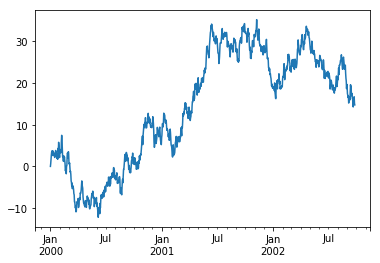

In [95]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

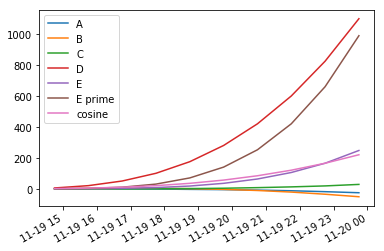

In [97]:
import matplotlib.pyplot as plt
pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')